In [71]:
import pandas as pd
import evalml
import woodwork as ww
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from featuretools.selection import remove_low_information_features, remove_highly_null_features, remove_single_value_features, remove_highly_correlated_features

In [72]:
df = pd.read_csv('merged.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,country,isonum,isocode,year,rank_educ,educ,qslnl,secvocp,teryrs,edqualsc,...,envi,fwateruse,airpollution,wasterwater,fishstock,marineprotect,improved_drinkwater,pestreg,terrestprotect,prosperity_score
0,Afghanistan,4,AFG,2007,143,22.494400,-7.178585,0.714436,0.207426,337.589355,...,39.293343,43.011665,0.1400,0.000000,35.323078,13.537368,42.6,0,0.366882,37.658975
1,Angola,24,AGO,2007,125,35.916668,-7.178585,39.072861,0.099019,280.802673,...,47.982162,0.476892,0.0250,0.000000,4.500000,0.066623,46.4,3,12.399823,43.880780
2,Albania,8,ALB,2007,72,56.318413,-7.178585,7.345947,0.127648,425.420013,...,51.049442,4.873606,0.2750,5.136225,37.099178,1.624084,95.9,5,9.804400,54.893284
3,United Arab Emirates,784,ARE,2007,52,59.942955,-7.178585,0.494192,0.488107,480.829529,...,62.051479,100.000000,0.1975,61.308900,30.838837,2.571971,99.6,23,5.616998,61.111192
4,Argentina,32,ARG,2007,92,51.995552,-7.178585,6.997118,0.265608,421.549591,...,64.909729,12.938356,0.0050,18.062500,12.280000,1.103726,97.7,23,5.466403,58.557573


In [73]:
metrics = ['educ', 'soci', 'heal', 'pers', 'busi', 'econ', 'safe', 'gove', 'envi']
ranks = ['rank_' + metric for metric in metrics]
drop = metrics + ranks + ['year', 'prosperity_score']

In [74]:
y = df['prosperity_score']

df = df.drop(drop, axis = 1)

df = remove_low_information_features(df)

df = remove_highly_null_features(df)

df = remove_single_value_features(df)

df = remove_highly_correlated_features(df)

X = df

In [75]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
country,0.0
isonum,0.0
isocode,0.0
qslnl,0.0
secvocp,0.0
...,...
fishstock,0.0
marineprotect,0.0
improved_drinkwater,0.0
pestreg,0.0


In [76]:
problem_type = 'regression'
objective =  'auto'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = X['country'])


automl = evalml.automl.AutoMLSearch(X_train, y_train, problem_type=problem_type, objective = objective)

Using default limit of max_batches=1.

Generating pipelines to search over...


In [77]:
automl.search()

*****************************
* Beginning pipeline search *
*****************************

Optimizing for R2. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: random_forest, lightgbm, linear_model, decision_tree, extra_trees, xgboost, catboost



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Batch 1: (1/9) Mean Baseline Regression Pipeline        Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean R2: -0.002
High coefficient of variation (cv >= 0.2) within cross validation scores. Mean Baseline Regression Pipeline may not perform as estimated on unseen data.
Batch 1: (2/9) Decision Tree Regressor w/ Imputer + ... Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean R2: 0.949
Batch 1: (3/9) Extra Trees Regressor w/ Imputer + On... Elapsed:00:02
	Starting cross validation
	Finished cross validation - mean R2: 0.982
Batch 1: (4/9) XGBoost Regressor w/ Imputer + One Ho... Elapsed:00:05
	Starting cross validation
	Finished cross validation - mean R2: 0.988
Batch 1: (5/9) CatBoost Regressor w/ Imputer            Elapsed:00:08
	Starting cross validation
	Finished cross validation - mean R2: 0.359
Batch 1: (6/9) Random Forest Regressor w/ Imputer + ... Elapsed:00:11
	Starting cross validation
	Finished cross validation - mean R2: 0.977


In [78]:
automl.rankings

,id,pipeline_name,score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,7,Linear Regressor w/ Imputer + One Hot Encoder ...,0.988256,0.988311,64078.516416,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,3,XGBoost Regressor w/ Imputer + One Hot Encoder,0.987822,0.990458,64050.424662,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,2,Extra Trees Regressor w/ Imputer + One Hot Enc...,0.982336,0.984813,63695.316288,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,8,Elastic Net Regressor w/ Imputer + One Hot Enc...,0.977581,0.980287,63387.484278,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,5,Random Forest Regressor w/ Imputer + One Hot E...,0.977354,0.984730,63372.741029,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,6,LightGBM Regressor w/ Imputer + One Hot Encoder,0.963305,0.965734,62463.267444,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,1,Decision Tree Regressor w/ Imputer + One Hot E...,0.949184,0.954437,61549.044124,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,4,CatBoost Regressor w/ Imputer,0.358700,0.355857,23321.847482,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mean Baseline Regression Pipeline,-0.001545,-0.002994,0.000000,True,{'Baseline Regressor': {'strategy': 'mean'}}


In [79]:
best_pipeline = automl.best_pipeline
imp = best_pipeline.feature_importance
best_pipeline.save('prosperity_best_pipeline')

In [80]:
best_pipeline = automl.load('prosperity_best_pipeline')

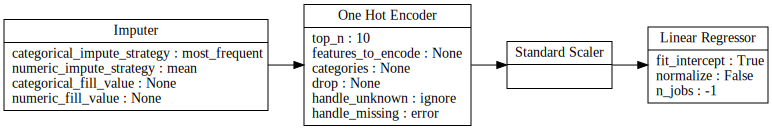

In [81]:
best_pipeline.graph()

In [82]:
best_pipeline.feature_importance

,feature,importance
0,isocode_NGA,-6.453449e+11
1,country_Nigeria,6.453449e+11
2,isocode_THA,2.749061e+11
3,country_Thailand,-2.749061e+11
4,country_Cyprus,1.625626e+11
...,...,...
89,isocode_SCG,2.421050e-02
90,isocode_MDG,-1.473692e-02
91,country_Tajikistan,-8.091358e-03
92,polity2,-6.682241e-03


In [83]:
best_pipeline.feature_importance[0:5].to_csv('prosperity_fi.csv', index = False)
best_pipeline.graph_feature_importance()

In [22]:
import os
datasets = os.listdir('Data')
train_csvs = [data for data in datasets if "train" in data]
col = dict()
for df in train_csvs:
    col[df] = pd.read_csv("Data/{}".format(df), index_col = 0).columns

In [32]:
def find_csv(col_name):
    for key in col.keys():
        if col_name in col[key]:
            return key

imp['dataset'] = imp['feature'].apply(lambda x: find_csv(x))

In [43]:
pd.DataFrame(imp.groupby('dataset')['importance'].sum().sort_values(ascending = False))

,importance
dataset,
gove_train.csv,0.518028
pers_train.csv,0.156088
econ_train.csv,0.129436
educ_train.csv,0.081465
heal_train.csv,0.065779
safe_train.csv,0.024753
busi_train.csv,0.015170
envi_train.csv,0.007281
soci_train.csv,0.002000


In [84]:
predictions = best_pipeline.predict(X_test)
predictions = predictions.to_series()

In [85]:
print('R2: ' + str(r2_score(y_test,  predictions)))
print('MSE: ' + str(mean_squared_error(y_test, predictions, squared = True)))
print('RMSE: ' + str(mean_squared_error(y_test, predictions, squared = False)))
print('MAE: ' + str(mean_absolute_error(y_test, predictions)))

metrics = pd.DataFrame()

metrics.at[0, 'R2'] = r2_score(y_test,  predictions)
metrics.at[0, 'MSE'] = mean_squared_error(y_test, predictions, squared = True)
metrics.at[0, 'RMSE'] = mean_squared_error(y_test, predictions, squared = False)
metrics.at[0, 'MAE'] = mean_absolute_error(y_test, predictions)

metrics.to_csv('prosperity_metrics.csv', index = False)

R2: 0.9906533836261187
MSE: 0.9420516534433115
RMSE: 0.9705934542553394
MAE: 0.7876269589655882


In [86]:
test = pd.read_csv('test.csv', index_col = 0)
test.head()

,country,isonum,isocode,year,qslnl,secvocp,teryrs,edqualsc,gbrata,secyrs,...,logis,bband,redu,hifi,affs,ippr,insdtf,creddtf,elcostlnl,stardtf
1192,Afghanistan,4,AFG,2015,-7.178585,0.961258,0.210655,337.589355,0.341660,0.998107,...,2.069573,0.004795,26.472107,3.633919,3.852955,2.457773,23.62,45.0,8.151823,93.05
1193,Angola,24,AGO,2015,-7.178585,45.228603,0.099019,280.802673,0.360500,1.820329,...,2.542980,0.412784,31.007937,2.593719,3.236488,2.257915,0.00,5.0,6.421622,76.79
1194,Albania,8,ALB,2015,-7.178585,8.005317,0.050267,425.420013,0.056140,3.402170,...,2.770000,6.573716,20.825397,3.888581,3.737438,2.896221,63.42,65.0,6.197258,90.09
1195,United Arab Emirates,784,ARE,2015,-7.178585,1.820017,0.458515,480.829529,0.034651,3.531861,...,3.539098,11.558400,4.285714,5.053419,5.424749,5.475348,43.74,45.0,3.157000,89.98
1196,Argentina,32,ARG,2015,-3.770851,13.699941,0.280885,421.549591,0.030080,2.664423,...,2.986475,15.573113,30.333333,2.583314,2.923875,2.424609,42.87,50.0,3.214868,73.36


In [87]:
drop = ['year']
df = test.copy()
df = df.drop(drop, axis = 1)

df = remove_low_information_features(df)

df = remove_highly_null_features(df)

df = remove_single_value_features(df)

df = remove_highly_correlated_features(df)

X = df

In [88]:
predictions = best_pipeline.predict(X)

predictions = predictions.to_series()

result = pd.DataFrame()

result['prosperity'] = predictions

result.head()

,prosperity
0,382.478457
1,320.412058
2,265.937746
3,284.269793
4,345.357981


In [89]:
df = pd.read_csv('test.csv')
temp = df[['country', 'year']]

result = pd.merge(left = temp, right = result, how="left", on=[temp.index, result.index])
result = result.drop(['key_0', 'key_1'], axis = 1)

result['rank_prosperity'] = result.groupby("year")["prosperity"].rank("dense", ascending=False)
result['rank_prosperity'] = result['rank_prosperity'].astype('int')

result = result[result['country'].isin(['Chad', 'Togo', 'Zimbabwe', 'Ivory Coast', 'Georgia'])]

result.head()

,country,year,prosperity,rank_prosperity
26,Ivory Coast,2015,320.869570,90
49,Georgia,2015,364.766887,64
131,Chad,2015,438.937422,15
132,Togo,2015,374.192911,56
148,Zimbabwe,2015,383.577395,48


In [90]:
result.to_csv('prosperity_predictions.csv', index=False)